# Import Packages and Data

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
a = pd.read_csv("Data/aggregated_logs.csv")
a.head()

,robot_id,experiment_id,distance,x_final,y_final,x_10,y_10,x_50,y_50,x_100,...,x_1000,y_1000,nb_north,nb_east,nb_south,nb_west,nb_north_wall_hit,nb_east_wall_hit,nb_south_wall_hit,nb_west_wall_hit
0,111,0111_9478,20958,621,10,493,36,504,47,476,...,299.0,15.0,1270,1272,1230,1228,179,0,132,0
1,1000,1000_1477,22777,181,824,498,498,474,471,464,...,503.0,552.0,1251,1218,1249,1282,0,0,0,0
2,111,0111_5789,21391,868,48,496,27,494,28,480,...,390.0,41.0,1250,1284,1250,1216,131,0,131,0
3,10,0010_1363,4868,19,7,46,25,44,26,37,...,38.0,21.0,1244,1238,1256,1262,13,0,16,73
4,1010,1010_5636,20843,40,13,0,7,8,0,8,...,48.0,40.0,1269,1246,1231,1254,147,49,135,88


In [142]:
a.columns

Index(['robot_id', 'experiment_id', 'distance', 'x_final', 'y_final', 'x_10',
       'y_10', 'x_50', 'y_50', 'x_100', 'y_100', 'x_500', 'y_500', 'x_1000',
       'y_1000', 'nb_north', 'nb_east', 'nb_south', 'nb_west',
       'nb_north_wall_hit', 'nb_east_wall_hit', 'nb_south_wall_hit',
       'nb_west_wall_hit'],
      dtype='object')

In [143]:
b = pd.read_csv("Data/path_logs.csv")
b.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,experiment_id,current_instruction,x,y,robot_id
0,0111_9478,10,493.0,36.0,111
1,1000_1477,10,498.0,498.0,1000
2,0111_5789,10,496.0,27.0,111
3,0010_1363,10,46.0,25.0,10
4,1010_5636,10,0.0,7.0,1010


# Process data and create aggregate table

In [144]:
a = a.replace(0, np.nan)

In [145]:
a = a.groupby(['robot_id'], as_index = False).agg({'experiment_id' : 'count',
                                                               'distance' : 'sum',
                                                               'x_final' : 'last',
                                                               'y_final' : 'last',
                                                               'nb_north_wall_hit' : 'count',
                                                               'nb_east_wall_hit' : 'count',
                                                               'nb_south_wall_hit' : 'count',
                                                               'nb_west_wall_hit' : 'count'})

In [146]:
a

,robot_id,experiment_id,distance,x_final,y_final,nb_north_wall_hit,nb_east_wall_hit,nb_south_wall_hit,nb_west_wall_hit
0,1.0,10000,563399490,93.0,60.0,10000,10000,10000,10000
1,10.0,10000,49049672,38.0,18.0,7605,4479,7589,4432
2,100.0,10000,6361588,45.0,31.0,5148,2471,4941,2520
3,101.0,10000,102231620,100.0,57.0,10000,10000,10000,0
4,110.0,10000,198649199,51.0,17.0,10000,10000,10000,10000
5,111.0,10000,212095921,724.0,50.0,10000,578,10000,600
6,1000.0,10000,224792689,578.0,103.0,613,568,591,540
7,1010.0,10000,207184211,2.0,46.0,10000,9993,10000,10000


In [147]:
a['average_distance'] = a['distance'] / a['experiment_id']

In [155]:
b.head()
# dataframe = a.merge(a, how='inner', on='robot_id')

,experiment_id,current_instruction,x,y,robot_id
0,0111_9478,10,493.0,36.0,111
1,1000_1477,10,498.0,498.0,1000
2,0111_5789,10,496.0,27.0,111
3,0010_1363,10,46.0,25.0,10
4,1010_5636,10,0.0,7.0,1010


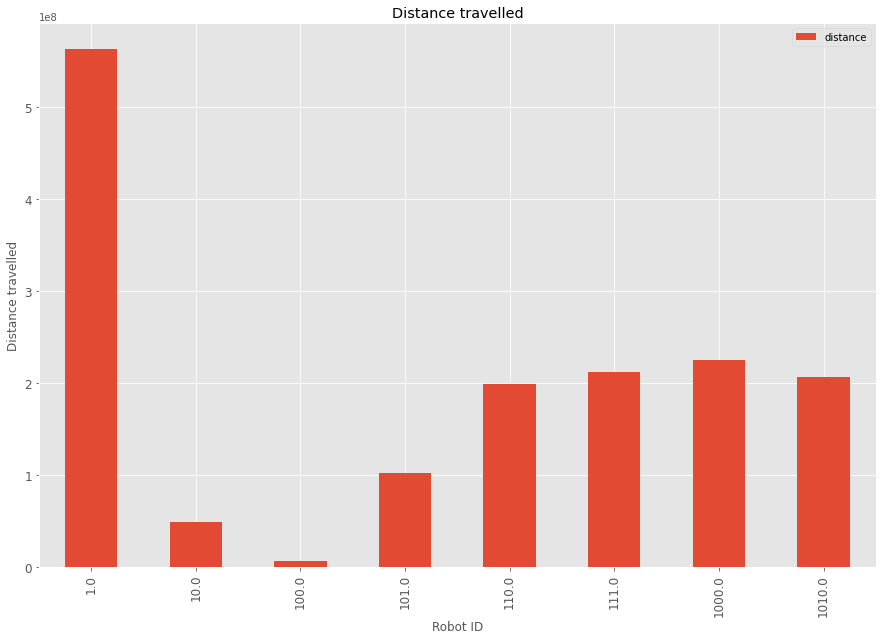

In [156]:
a1 = a[['robot_id', 'distance']]
a1.set_index('robot_id', inplace = True)
#a1.head()
plt.style.use('ggplot')
ax = a1[['distance']].plot(kind='bar', title ="Distance travelled",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Robot ID",fontsize=12)
ax.set_ylabel("Distance travelled",fontsize=12)
plt.show()

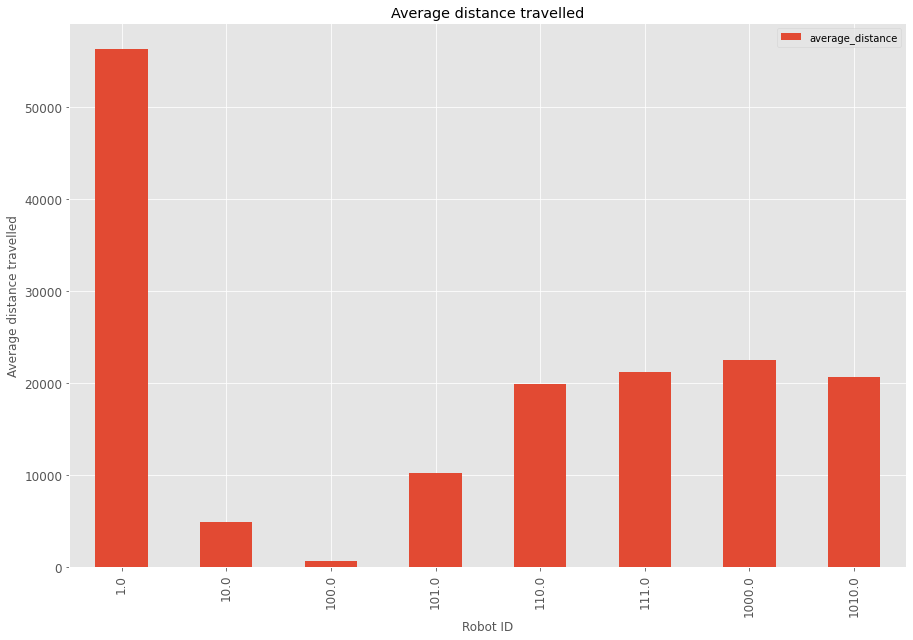

In [157]:
a3 = a[['robot_id', 'average_distance']]
a3.set_index('robot_id', inplace = True)
#a1.head()
plt.style.use('ggplot')
ax = a3[['average_distance']].plot(kind='bar', title ="Average distance travelled",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Robot ID",fontsize=12)
ax.set_ylabel("Average distance travelled",fontsize=12)
plt.show()

In [158]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd

In [159]:
a.head()

,robot_id,experiment_id,distance,x_final,y_final,nb_north_wall_hit,nb_east_wall_hit,nb_south_wall_hit,nb_west_wall_hit,average_distance
0,1.0,10000,563399490,93.0,60.0,10000,10000,10000,10000,56339.9490
1,10.0,10000,49049672,38.0,18.0,7605,4479,7589,4432,4904.9672
2,100.0,10000,6361588,45.0,31.0,5148,2471,4941,2520,636.1588
3,101.0,10000,102231620,100.0,57.0,10000,10000,10000,0,10223.1620
4,110.0,10000,198649199,51.0,17.0,10000,10000,10000,10000,19864.9199


<ipython-input-160-f40a0d91a861>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0, 0.5, 'Y axis')

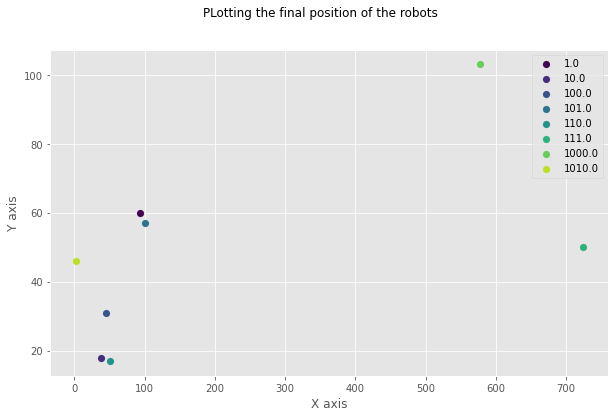

In [160]:
fig, ax = plt.subplots()
a2 = a[['robot_id', 'x_final', 'y_final']]
colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(a2['robot_id']))]
for i,c in enumerate(colorlist):
    x = a2['x_final'][i]
    y = a2['y_final'][i]
    l = a2['robot_id'][i]
    ax.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)
ax.legend()
fig.show()
fig.set_size_inches(10, 6)
fig.suptitle('PLotting the final position of the robots')
plt.xlabel('X axis')
plt.ylabel('Y axis')

<ipython-input-161-4981f35e97f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2['robot_id'] = a2['robot_id'].astype(str)


Text(0, 0.5, 'Number of hits')

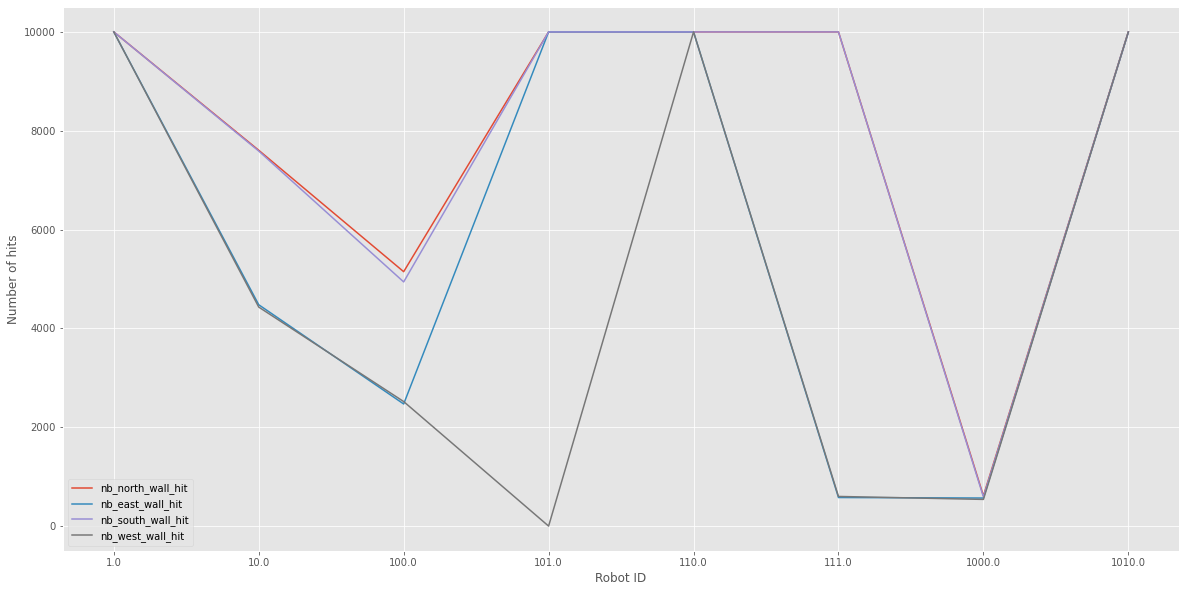

In [161]:
a2 = a[['robot_id' ,'nb_north_wall_hit', 'nb_east_wall_hit', 'nb_south_wall_hit', 'nb_west_wall_hit']]
a2['robot_id'] = a2['robot_id'].astype(str) 
a2.set_index('robot_id', inplace = True)
lines = a2.plot.line(figsize=(20, 10))
plt.xlabel('Robot ID')
plt.ylabel('Number of hits')
